# Sentiment Analysis on Product Review Data

## Import Necessary Libraries

In [ ]:
# Importing necessary libraries for basic visualization
import pandas as pd              # data processing
import numpy as np               # linear algebra           
import matplotlib.pyplot as plt  # ploting the data
import seaborn as sns            # ploting the data

# Sklearn Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB
from sklearn.linear_model import SGDClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

# Libraries for processing textual data
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import re
import string
from textblob import TextBlob

# PipeLine
from sklearn.pipeline import Pipeline

# Libraries for the NLTK
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

!pip install transformers
!pip install nlpaug

# Import Warnig Lib
import warnings                 
warnings.filterwarnings('ignore') # Ignore unnecessary warnings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import data

In [ ]:
review=pd.read_excel('/content/drive/MyDrive/Project_107/Noise_fit_smartwatch_review_dataset.xlsx')
review

,title,rating,body
0,"4.5 ⭐Awesome design, good specs and features. ...",5.0,The media could not be loaded.\n ...
1,DO NOT BUY THIS PRODUCT,1.0,"Pathetic quality product, not even worth 1000 ..."
2,Issue in smartwatch,2.0,I am not getting call notification in smart watch
3,Looks doesn't matter.. Completely Worthless!!,1.0,Apart from showing accurate time & much health...
4,worthless product.,1.0,this product does not support with one plus ph...
...,...,...,...
4405,wrost,1.0,only post 7 days of purchase watch is automati...
4406,Value for money,3.0,"Sleep app sync not accurate,Sometimes touch sc..."
4407,Functional issues,2.0,Not properly functioning and not worthy at thi...
4408,Perfection.,5.0,This is so awesome and cool. I loved it so muc...


In [ ]:
review.shape

(4410, 3)

## Data Cleaning and text preprocessing

In [ ]:
# duplicate values present in data
review[review.duplicated()]

,title,rating,body
2210,Nice,4.0,Nice
2250,Good,4.0,Good
2514,Good,4.0,Good
2625,Good,5.0,Nice product
2635,Good,4.0,Good
2638,Excellent,5.0,Excellent
2683,Good,4.0,Good
2892,Good,5.0,Nice
2989,Good,5.0,Good
3025,Good product,5.0,Good product


In [ ]:
review.drop_duplicates(inplace=True)

In [ ]:
# Count missing values for each column of the data
review.isnull().sum()

title     0
rating    0
body      5
dtype: int64

In [ ]:
review.dropna(axis=0,inplace=True)

In [ ]:
review.isnull().sum()

title     0
rating    0
body      0
dtype: int64

In [ ]:
review

,title,rating,body
0,"4.5 ⭐Awesome design, good specs and features. ...",5.0,The media could not be loaded.\n ...
1,DO NOT BUY THIS PRODUCT,1.0,"Pathetic quality product, not even worth 1000 ..."
2,Issue in smartwatch,2.0,I am not getting call notification in smart watch
3,Looks doesn't matter.. Completely Worthless!!,1.0,Apart from showing accurate time & much health...
4,worthless product.,1.0,this product does not support with one plus ph...
...,...,...,...
4405,wrost,1.0,only post 7 days of purchase watch is automati...
4406,Value for money,3.0,"Sleep app sync not accurate,Sometimes touch sc..."
4407,Functional issues,2.0,Not properly functioning and not worthy at thi...
4408,Perfection.,5.0,This is so awesome and cool. I loved it so muc...


In [ ]:
# Remove all the Punctuations for the string in Review

def remove_punctuation(text):
  no_punct =[words for words in text
             if words not in string.punctuation]
  wo_punct=''.join(no_punct)
  return wo_punct   


In [ ]:
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
review['title']=review['title'].apply(lambda x: remove_punctuation(x.lower()))
review['body']=review['body'].apply(lambda x: remove_punctuation(x.lower()))

In [ ]:
review

,title,rating,body
0,45 ⭐awesome design good specs and features mib...,5.0,the media could not be loaded\n ...
1,do not buy this product,1.0,pathetic quality product not even worth 1000 r...
2,issue in smartwatch,2.0,i am not getting call notification in smart watch
3,looks doesnt matter completely worthless,1.0,apart from showing accurate time much healthy...
4,worthless product,1.0,this product does not support with one plus ph...
...,...,...,...
4405,wrost,1.0,only post 7 days of purchase watch is automati...
4406,value for money,3.0,sleep app sync not accuratesometimes touch scr...
4407,functional issues,2.0,not properly functioning and not worthy at thi...
4408,perfection,5.0,this is so awesome and cool i loved it so much...


In [ ]:
# stemming and stop word removal
stemmer = PorterStemmer()
words = stopwords.words("english") 
review['title']= review['title'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
review['body']= review['body'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
review

,title,rating,body
0,awesom design good spec featur miband crusher,5.0,media could load smartwatch smartband offer le...
1,buy product,1.0,pathet qualiti product even worth rupe highli ...
2,issu smartwatch,2.0,get call notif smart watch
3,look doesnt matter complet worthless,1.0,apart show accur time much healthi batteri loo...
4,worthless product,1.0,product support one plu phone worthless produc...
...,...,...,...
4405,wrost,1.0,post day purchas watch automat switch useless
4406,valu money,3.0,sleep app sync accuratesometim touch screen ge...
4407,function issu,2.0,properli function worthi prize
4408,perfect,5.0,awesom cool love much receiv day place order w...


In [ ]:
# classify the reviews in three categories
def classify(x):
  if x==5.0 or x==4.0:
    return ('Positive')
  elif x==3.0:
    return ('Neutral')
  else :
    return ('Negative')

In [ ]:
review['rating_inference']=review['rating'].apply(classify)

In [ ]:
# Checking the data types
review.dtypes

title                object
rating              float64
body                 object
rating_inference     object
dtype: object

In [ ]:
# classify the reviews in three categories 
def classify_1(x):
  if x==5 or x==4:
    return 2
  elif x==3.0 :
    return 1
  elif x==2.0 or x==1.0:
    return 0

In [ ]:
review['rating_num']=review['rating'].apply(classify_1)
review

,title,rating,body,rating_inference,rating_num
0,awesom design good spec featur miband crusher,5.0,media could load smartwatch smartband offer le...,Positive,2
1,buy product,1.0,pathet qualiti product even worth rupe highli ...,Negative,0
2,issu smartwatch,2.0,get call notif smart watch,Negative,0
3,look doesnt matter complet worthless,1.0,apart show accur time much healthi batteri loo...,Negative,0
4,worthless product,1.0,product support one plu phone worthless produc...,Negative,0
...,...,...,...,...,...
4405,wrost,1.0,post day purchas watch automat switch useless,Negative,0
4406,valu money,3.0,sleep app sync accuratesometim touch screen ge...,Neutral,1
4407,function issu,2.0,properli function worthi prize,Negative,0
4408,perfect,5.0,awesom cool love much receiv day place order w...,Positive,2


## EDA

In [ ]:
# Count of reviews by categories
review['rating_inference'].value_counts()

Positive    2384
Negative    1525
Neutral      466
Name: rating_inference, dtype: int64

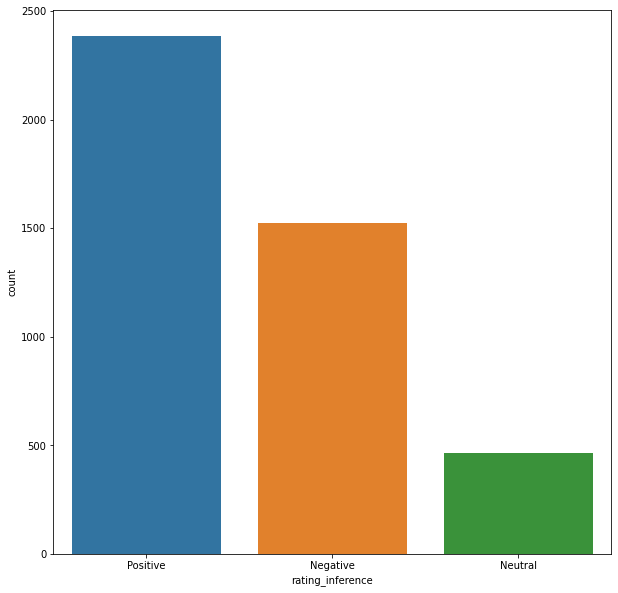

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='rating_inference', data=review)

In [ ]:

Positive=review[review['rating_inference'] == "Positive"]
Negative=review[review['rating_inference'] == "Negative"]
Neutral=review[review['rating_inference'] == "Neutral"]

## Percentage of neutral, negative, positive Reviews


In [ ]:
len(review[review['rating_inference'] =="Positive"])/len(review) * 100

54.49142857142857

In [ ]:
len(review[review['rating_inference'] =="Negative"])/len(review) * 100

34.85714285714286

In [ ]:
len(review[review['rating_inference'] == "Neutral"])/len(review) * 100


10.651428571428571

## Word Clouds

In [ ]:
Neutral

,title,rating,body,rating_inference,rating_num
24,display good,3.0,display qualilti okay function best,Neutral,1
45,dont wast money,3.0,expect could option smart watch less featur gi...,Neutral,1
52,averag product price rang,3.0,use product month nowfew good thingseasi setup...,Neutral,1
58,good smart watchapp need improv,3.0,use fit band mi band year shift smartwatch see...,Neutral,1
69,watch face transfer bad,3.0,everyth fine watch face transmiss bad take max...,Neutral,1
...,...,...,...,...,...
4357,plz add new watch face,3.0,good plz add watch face colorfit pro,Neutral,1
4393,ok,3.0,buy pleas confirm compat ur phone notrest good,Neutral,1
4394,receiv broken seal box use watch,3.0,open parcel see box alreadi open seal box watc...,Neutral,1
4403,goahead price rang,3.0,product good display size expect inthi price r...,Neutral,1


## Most popular words in reviews

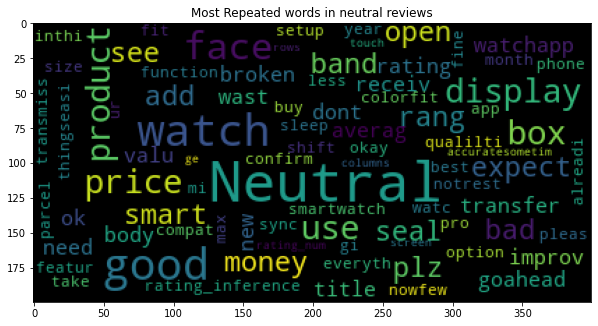

In [ ]:
stop_words=set(STOPWORDS)
wordcloud=WordCloud(max_font_size=40,stopwords=stop_words).generate(str(Neutral))

fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.title("Most Repeated words in neutral reviews")
plt.show()

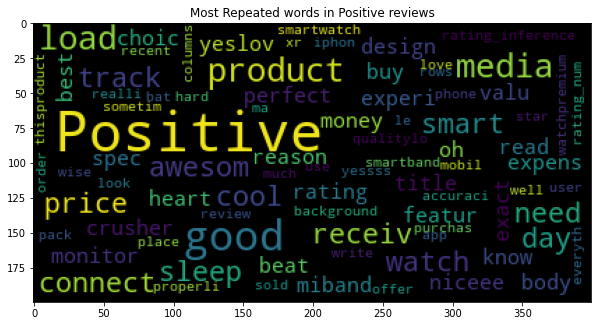

In [ ]:
wordcloud=WordCloud(max_font_size=40,stopwords=stop_words).generate(str(Positive))
plt.figure(figsize = (10,10))
plt.title("Most Repeated words in Positive reviews")
plt.imshow(wordcloud)
plt.show()

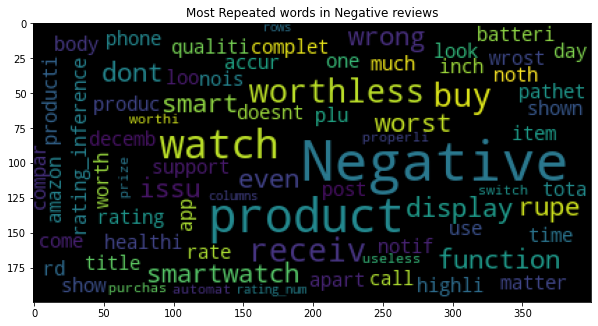

In [ ]:
wordcloud=WordCloud(max_font_size=40,stopwords=stop_words).generate(str(Negative))
plt.figure(figsize = (10,10))
plt.title("Most Repeated words in Negative reviews")
plt.imshow(wordcloud)
plt.show()

In [ ]:
Positive[:5]

,title,rating,body,rating_inference,rating_num
0,awesom design good spec featur miband crusher,5.0,media could load smartwatch smartband offer le...,Positive,2
5,oh yeslov,4.0,media could load receiv watchpremium qualitylo...,Positive,2
8,read buy,4.0,product good price sold accuraci look wise bat...,Positive,2
9,valu money,4.0,use day write review product well pack user ma...,Positive,2
13,smart choic expens smart watch,4.0,background recent purchas iphon xr realli need...,Positive,2


## Distribution of most popular words in reviews

In [ ]:
vec=CountVectorizer(ngram_range=(2,2),stop_words='english').fit(Positive['body'])
bag_of_words_pos=vec.transform(Positive['body'])
sum_words_pos=bag_of_words_pos.sum(axis=0)
words_freq_pos=[(word,sum_words_pos[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq_pos= sorted(words_freq_pos, key= lambda x:x[1], reverse=True)

words_freq_pos[:5]

[('smart watch', 204),
 ('good product', 174),
 ('touch screen', 140),
 ('batteri life', 129),
 ('watch face', 125)]

In [ ]:
vec=CountVectorizer(ngram_range=(2,2),stop_words='english').fit(Neutral['body'])
bag_of_words_nue=vec.transform(Neutral['body'])
sum_words_nue=bag_of_words_nue.sum(axis=0)
words_freq_nue = [(word, sum_words_nue[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq_nue =sorted(words_freq_nue, key = lambda x: x[1], reverse=True)

words_freq_nue[:5]

[('heart rate', 30),
 ('watch face', 29),
 ('batteri life', 25),
 ('look good', 23),
 ('smart watch', 21)]

In [ ]:
vec=CountVectorizer(ngram_range=(2,2),stop_words='english').fit(Negative['body'])
bag_of_words_neg=vec.transform(Negative['body'])
sum_words_neg=bag_of_words_neg.sum(axis=0)
words_freq_neg=[(word,sum_words_neg[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq_neg= sorted(words_freq_neg, key= lambda x:x[1], reverse=True)

words_freq_neg[:5]

[('wast money', 139),
 ('dont buy', 134),
 ('media load', 100),
 ('smart watch', 86),
 ('heart rate', 78)]

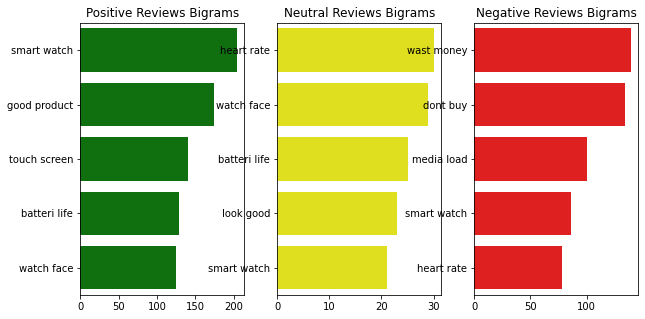

In [ ]:


common_words_Positive=words_freq_pos[:5]
common_words_Neutral=words_freq_nue[:5]
common_words_Negative=words_freq_neg[:5]

x=[x[0] for x in common_words_Positive]
y=[x[1] for x in common_words_Positive]

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('Positive Reviews Bigrams')
sns.barplot(y,x,color='green')

x=[x[0] for x in common_words_Neutral]
y=[x[1] for x in common_words_Neutral]


plt.subplot(1,3,2)
plt.title('Neutral Reviews Bigrams')
sns.barplot(y,x,color='yellow')


x=[x[0] for x in common_words_Negative]
y=[x[1] for x in common_words_Negative]

plt.subplot(1,3,3)
plt.title('Negative Reviews Bigrams')
sns.barplot(y,x,color='red')
plt.show()

## Sendiment distibutions

In [ ]:
review['sentiment']=review['body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
review.head()

,title,rating,body,rating_inference,rating_num,sentiment
0,awesom design good spec featur miband crusher,5.0,media could load smartwatch smartband offer le...,Positive,2,2.467659e-01
1,buy product,1.0,pathet qualiti product even worth rupe highli ...,Negative,0,-2.775558e-17
2,issu smartwatch,2.0,get call notif smart watch,Negative,0,2.142857e-01
3,look doesnt matter complet worthless,1.0,apart show accur time much healthi batteri loo...,Negative,0,2.114286e-01
4,worthless product,1.0,product support one plu phone worthless produc...,Negative,0,-8.000000e-01


In [ ]:
review['subjectivity']=review['body'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
review.head()

,title,rating,body,rating_inference,rating_num,sentiment,subjectivity
0,awesom design good spec featur miband crusher,5.0,media could load smartwatch smartband offer le...,Positive,2,2.467659e-01,0.455972
1,buy product,1.0,pathet qualiti product even worth rupe highli ...,Negative,0,-2.775558e-17,0.250000
2,issu smartwatch,2.0,get call notif smart watch,Negative,0,2.142857e-01,0.642857
3,look doesnt matter complet worthless,1.0,apart show accur time much healthi batteri loo...,Negative,0,2.114286e-01,0.377619
4,worthless product,1.0,product support one plu phone worthless produc...,Negative,0,-8.000000e-01,0.900000


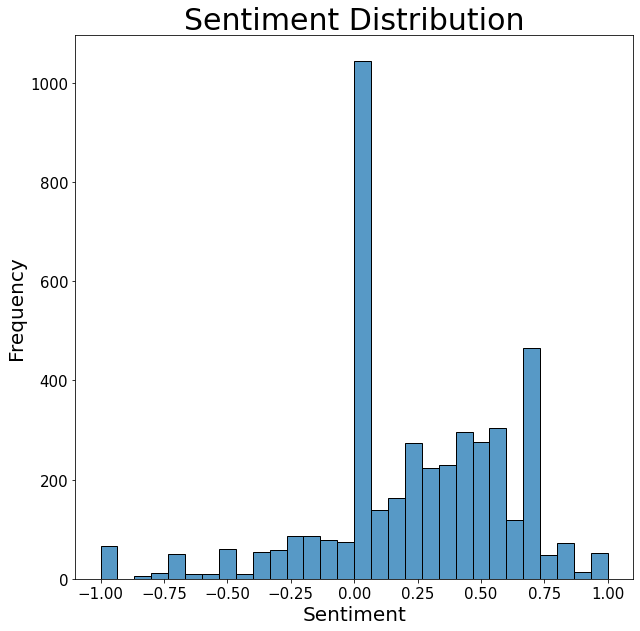

In [ ]:
#visualization of sentiment distribution 
plt.figure(figsize=(10,10))

plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=15)
sns.histplot(review['sentiment'],bins=30)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

#### We can Conclude that there's more reviews that look neutral exist in our data set than positive and negative reviews. We also see that people tend to put in reviews only when they feel positive or neutral about the product. they barely put review when its rally bad product.



Correlation heatmap of lenght of review and sentiment 

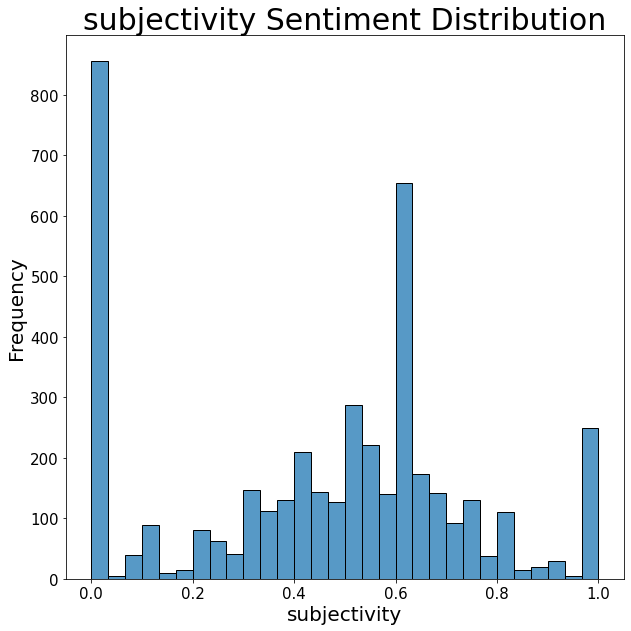

In [ ]:
#visualization of sentiment distribution 
plt.figure(figsize=(10,10))

plt.xlabel('subjectivity', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=15)
sns.histplot(review['subjectivity'],bins=30)
plt.title('subjectivity Sentiment Distribution', fontsize=30)
plt.show()

## Model Building

In [ ]:


# using bag of words with ngram range of (1,1)

counter_vectorizer =CountVectorizer(ngram_range=(1,1))
review_counter_vectorizer=counter_vectorizer.fit_transform(review['body'])


In [ ]:
print(counter_vectorizer.vocabulary_)

{'media': 3292, 'could': 1291, 'load': 3127, 'smartwatch': 5055, 'smartband': 5049, 'offer': 3715, 'less': 3060, 'similar': 4974, 'function': 2199, 'except': 1862, 'one': 3759, 'take': 5405, 'call': 863, 'watch': 6029, 'want': 6004, 'get': 2252, 'appl': 321, 'wife': 6230, 'impress': 2668, 'design': 1505, 'fortun': 2140, 'found': 2145, 'nois': 3608, 'colorfit': 1093, 'pro': 4175, 'look': 3147, 'premium': 4121, 'like': 3094, 'bought': 727, 'rs': 4712, 'box': 732, 'smart': 5048, 'modul': 3421, 'screen': 4798, 'protector': 4338, 'appli': 325, 'mm': 3397, 'wide': 6229, 'tpu': 5664, 'strap': 5265, 'charg': 970, 'cabl': 851, 'instruct': 2746, 'manual': 3231, 'warranti': 6011, 'registr': 4544, 'card': 903, 'featur': 2005, 'inch': 2690, 'capacit': 899, 'display': 1628, 'curv': 1338, 'glass': 2276, 'antifingerprint': 279, 'coat': 1081, 'ip': 2777, 'full': 2192, 'dustproof': 1722, 'waterproof': 6124, 'mah': 3208, 'batteri': 556, 'day': 1392, 'usag': 5845, 'standbi': 5204, 'bluetooth': 699, 'ble':

In [ ]:
review.index.values

array([   0,    1,    2, ..., 4407, 4408, 4409])

In [ ]:
review_1=review.iloc[:,0:5]
review_1

,title,rating,body,rating_inference,rating_num
0,awesom design good spec featur miband crusher,5.0,media could load smartwatch smartband offer le...,Positive,2
1,buy product,1.0,pathet qualiti product even worth rupe highli ...,Negative,0
2,issu smartwatch,2.0,get call notif smart watch,Negative,0
3,look doesnt matter complet worthless,1.0,apart show accur time much healthi batteri loo...,Negative,0
4,worthless product,1.0,product support one plu phone worthless produc...,Negative,0
...,...,...,...,...,...
4405,wrost,1.0,post day purchas watch automat switch useless,Negative,0
4406,valu money,3.0,sleep app sync accuratesometim touch screen ge...,Neutral,1
4407,function issu,2.0,properli function worthi prize,Negative,0
4408,perfect,5.0,awesom cool love much receiv day place order w...,Positive,2


In [ ]:
X=review['body']
y=review['rating_num']

In [ ]:
y.unique()

array([2, 0, 1])

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((3500,), (875,), (3500,), (875,))

In [ ]:
X_train.values

array(['eveyth good batteri backup upto day',
       'good valu money u track ur daili activ watch via noisefit app',
       'sleep track accur get min sleep wouldnt track step counter also complet wrong doesnt track step properli touch good overal worthi product',
       ..., 'amaz watch perfect fitbatteri lyf',
       'touch screen good perforamencemobil app think littl time work respons immedit',
       'poor vibrat what app callno proper notif phonedont wast money buy watch'],
      dtype=object)

In [ ]:
# Using Tfidf with ngram range of (1,1)

vectorizer= TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
tfidf_vectorizer=vectorizer.fit_transform(X_train)


In [ ]:
vectorizer.get_feature_names()

In [ ]:
def trails(model):
  model.fit(X_train,y_train)
  y_pred_test=model.predict(X_test)
  model_accuracy=accuracy_score(y_test,y_pred_test)
  model_matrix=confusion_matrix(y_test,y_pred_test)
  print('accuracy_score:', model_accuracy)
  print('confusion_matrix: \n', model_matrix)
  print('classification_report\n',classification_report(y_test,y_pred_test))
  print("\nPrecision Score")
  print(precision_score(y_test,y_pred_test,average='weighted'))
  print("\nRecall Score")
  print(recall_score(y_test,y_pred_test,average='weighted')) 
  heat_map=sns.heatmap(model_matrix, annot=True,fmt='g')
  heat_map.set_title('confusion_matrix')
  heat_map.set_xlabel('Predicted_Sentiment')
  heat_map.set_ylabel('Actual_Sentiment')
  plt.show()
 #y_pred_test=model.predict_proba(X_test)  
  #print(y_pred_test[:10])

In [ ]:
#Grid_parameter_boosting=GridSearchCV(estimator=GradientBoostingClassifier(), param_grid={'loss' : ['deviance', 'exponential'],'learning_rate':[0.01,0.08,0.1,0.14,0.16,0.18]})

In [ ]:
#Grid_parameter_boosting.fit(tfidf_vectorizer,y_train)

In [ ]:
#Grid_parameter_boosting.best_params_

In [ ]:
classifier_1=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', GradientBoostingClassifier(loss='deviance',learning_rate=0.14)),])

In [ ]:
classifier_2=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', GradientBoostingClassifier(loss='deviance',learning_rate=0.14)),])

accuracy_score: 0.752
confusion_matrix: 
 [[212   8  81]
 [ 32   4  56]
 [ 35   5 442]]
classification_report
               precision    recall  f1-score   support

           0       0.76      0.70      0.73       301
           1       0.24      0.04      0.07        92
           2       0.76      0.92      0.83       482

    accuracy                           0.75       875
   macro avg       0.59      0.55      0.55       875
weighted avg       0.71      0.75      0.72       875


Precision Score
0.706646337670396

Recall Score
0.752


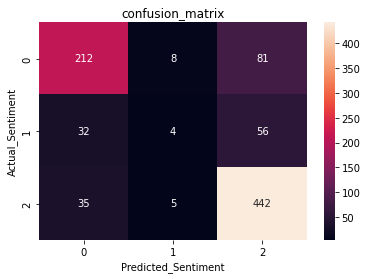

In [ ]:
trails(classifier_1)

accuracy_score: 0.7462857142857143
confusion_matrix: 
 [[207   3  91]
 [ 26   2  64]
 [ 36   2 444]]
classification_report
               precision    recall  f1-score   support

           0       0.77      0.69      0.73       301
           1       0.29      0.02      0.04        92
           2       0.74      0.92      0.82       482

    accuracy                           0.75       875
   macro avg       0.60      0.54      0.53       875
weighted avg       0.70      0.75      0.71       875


Precision Score
0.7030693813716536

Recall Score
0.7462857142857143


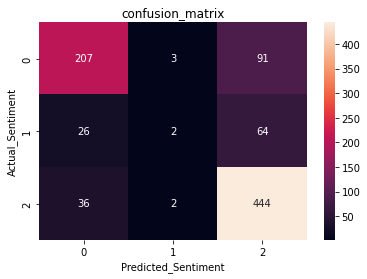

In [ ]:
trails(classifier_2)

In [ ]:
def optimum_learing_rate_tfidf(Algo):
  x_alpha=[0.000001,0.000006,0.000008,0.00001,0.000014,0.000015,0.000018,0.00002,0.00003,0.00005,0.00008,.0001,.001,0.002,0.005,0.009,0.01,0.1,0.4,0.6,0.8,0.9,1,1.2,1.5,1.8,2,2.2,2.4,2.6,2.8,3,4,5]
  y_accuracy=[]
  for x in x_alpha:
    clf = Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf',Algo(alpha=x)),])
    classifier_model = clf.fit(X_train,y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== y_test))
  plt.plot(x_alpha,y_accuracy,'^k')
  plt.ylabel('Accuracies')
  plt.xlabel('Learning Rate')
  plt.show()
  print('optimum_learing_rate:',x_alpha[y_accuracy.index(max(y_accuracy))])

In [ ]:
def optimum_learing_rate_counter_vect(Algo):
  x_alpha=[0.000001,0.000006,0.000008,0.00001,0.000014,0.000015,0.000018,0.00002,0.00003,0.00005,0.00008,.0001,.001,0.002,0.005,0.009,0.01,0.1,0.4,0.6,0.8,0.9,1,1.2,1.5,1.8,2,2.2,2.4,2.6,2.8,3,4,5]
  y_accuracy=[]
  for x in x_alpha:
    clf = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf',Algo(alpha=x)),])
    classifier_model = clf.fit(X_train,y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== y_test))
  plt.plot(x_alpha,y_accuracy,'^k')
  plt.ylabel('Accuracies')
  plt.xlabel('Learning Rate')
  plt.show()
 
  print('optimum_learing_rate:',x_alpha[y_accuracy.index(max(y_accuracy))])

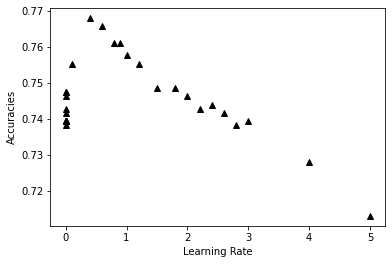

optimum_learing_rate: 0.4


In [ ]:
optimum_learing_rate_tfidf(MultinomialNB)

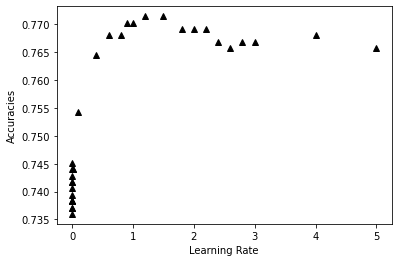

optimum_learing_rate: 1.2


In [ ]:
optimum_learing_rate_counter_vect(MultinomialNB)

In [ ]:
classifier_3=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', MultinomialNB(alpha=0.1)),])

In [ ]:
classifier_4=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', MultinomialNB(alpha=1.8)),])

accuracy_score: 0.7554285714285714
confusion_matrix: 
 [[216   4  81]
 [ 33   0  59]
 [ 33   4 445]]
classification_report
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       301
           1       0.00      0.00      0.00        92
           2       0.76      0.92      0.83       482

    accuracy                           0.76       875
   macro avg       0.51      0.55      0.53       875
weighted avg       0.68      0.76      0.71       875


Precision Score
0.6825174447302106

Recall Score
0.7554285714285714


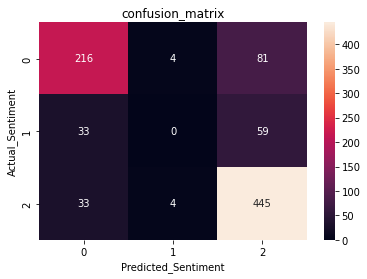

In [ ]:
trails(classifier_3)

accuracy_score: 0.7691428571428571
confusion_matrix: 
 [[228   4  69]
 [ 31   4  57]
 [ 37   4 441]]
classification_report
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       301
           1       0.33      0.04      0.08        92
           2       0.78      0.91      0.84       482

    accuracy                           0.77       875
   macro avg       0.63      0.57      0.56       875
weighted avg       0.73      0.77      0.73       875


Precision Score
0.7284650364650365

Recall Score
0.7691428571428571


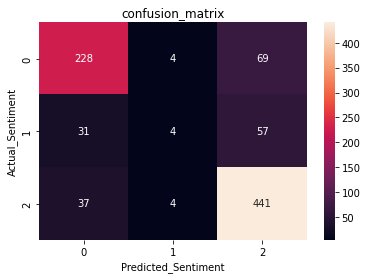

In [ ]:
trails(classifier_4)

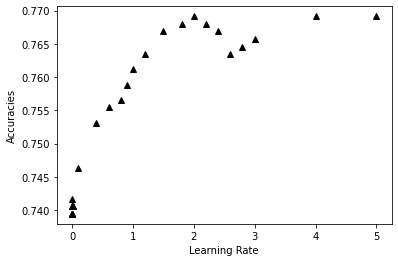

optimum_learing_rate: 2


In [ ]:
optimum_learing_rate_tfidf(ComplementNB)

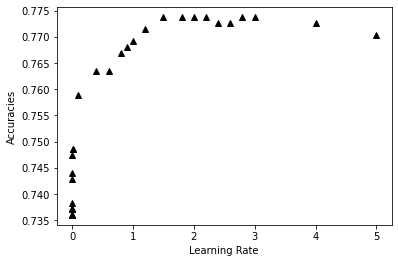

optimum_learing_rate: 1.5


In [ ]:
optimum_learing_rate_counter_vect(ComplementNB)

In [ ]:
classifier_5=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', ComplementNB(alpha=2.4)),])

In [ ]:
classifier_6=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', ComplementNB(alpha=2)),])

accuracy_score: 0.7668571428571429
confusion_matrix: 
 [[239  11  51]
 [ 38  11  43]
 [ 51  10 421]]
classification_report
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       301
           1       0.34      0.12      0.18        92
           2       0.82      0.87      0.84       482

    accuracy                           0.77       875
   macro avg       0.63      0.60      0.59       875
weighted avg       0.74      0.77      0.75       875


Precision Score
0.7371137376949358

Recall Score
0.7668571428571429


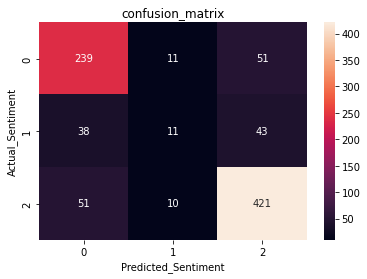

In [ ]:
trails(classifier_5)

accuracy_score: 0.7737142857142857
confusion_matrix: 
 [[242   7  52]
 [ 41   7  44]
 [ 49   5 428]]
classification_report
               precision    recall  f1-score   support

           0       0.73      0.80      0.76       301
           1       0.37      0.08      0.13        92
           2       0.82      0.89      0.85       482

    accuracy                           0.77       875
   macro avg       0.64      0.59      0.58       875
weighted avg       0.74      0.77      0.75       875


Precision Score
0.7394205803296986

Recall Score
0.7737142857142857


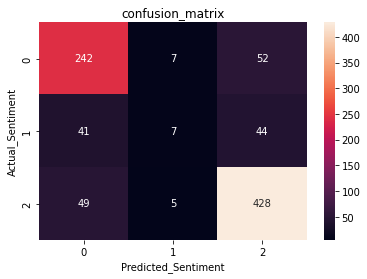

In [ ]:
trails(classifier_6)

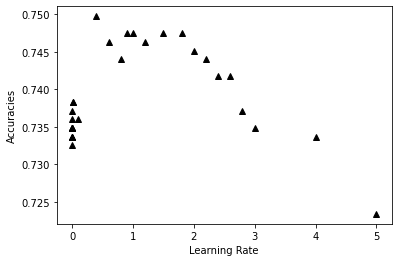

optimum_learing_rate: 0.4


In [ ]:
optimum_learing_rate_tfidf(BernoulliNB)

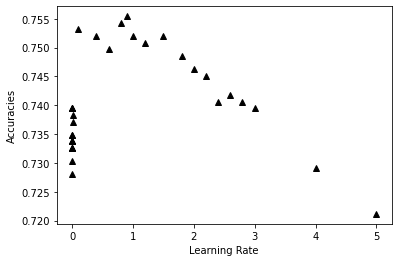

optimum_learing_rate: 0.9


In [ ]:
optimum_learing_rate_counter_vect(BernoulliNB)

In [ ]:
classifier_7=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', BernoulliNB(alpha=0.1)),])

In [ ]:
classifier_8=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', BernoulliNB(alpha=1.5)),])

accuracy_score: 0.736
confusion_matrix: 
 [[205  30  66]
 [ 27  15  50]
 [ 35  23 424]]
classification_report
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       301
           1       0.22      0.16      0.19        92
           2       0.79      0.88      0.83       482

    accuracy                           0.74       875
   macro avg       0.59      0.57      0.58       875
weighted avg       0.72      0.74      0.73       875


Precision Score
0.719837995223058

Recall Score
0.736


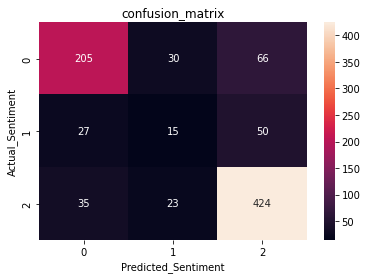

In [ ]:
trails(classifier_7)

accuracy_score: 0.752
confusion_matrix: 
 [[200  10  91]
 [ 24   6  62]
 [ 23   7 452]]
classification_report
               precision    recall  f1-score   support

           0       0.81      0.66      0.73       301
           1       0.26      0.07      0.10        92
           2       0.75      0.94      0.83       482

    accuracy                           0.75       875
   macro avg       0.61      0.56      0.56       875
weighted avg       0.72      0.75      0.72       875


Precision Score
0.717520550263134

Recall Score
0.752


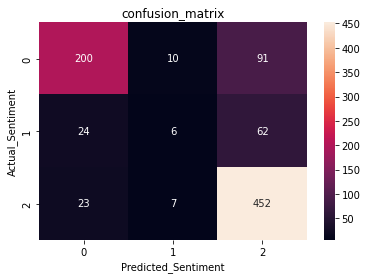

In [ ]:
trails(classifier_8)

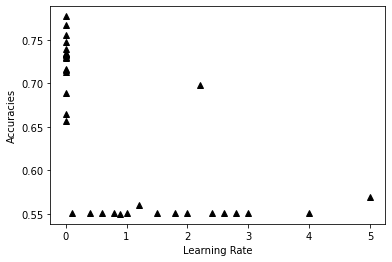

optimum_learing_rate: 0.002


In [ ]:
optimum_learing_rate_tfidf(SGDClassifier)

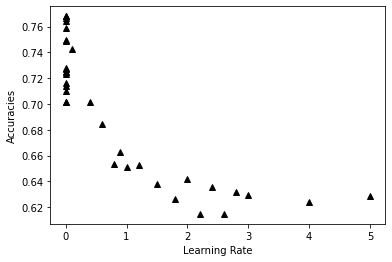

optimum_learing_rate: 0.009


In [ ]:
optimum_learing_rate_counter_vect(SGDClassifier)

In [ ]:
classifier_9=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', SGDClassifier(alpha=0.001)),])

In [ ]:
classifier_10=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', SGDClassifier(alpha=0.009)),])

accuracy_score: 0.768
confusion_matrix: 
 [[232   0  69]
 [ 39   0  53]
 [ 40   2 440]]
classification_report
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       301
           1       0.00      0.00      0.00        92
           2       0.78      0.91      0.84       482

    accuracy                           0.77       875
   macro avg       0.51      0.56      0.53       875
weighted avg       0.69      0.77      0.73       875


Precision Score
0.6878934182499996

Recall Score
0.768


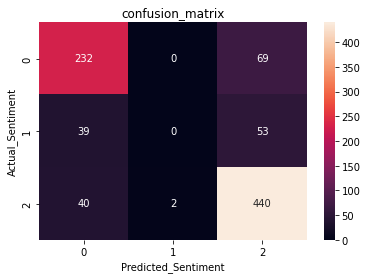

In [ ]:
trails(classifier_9)

accuracy_score: 0.7691428571428571
confusion_matrix: 
 [[222   0  79]
 [ 36   0  56]
 [ 31   0 451]]
classification_report
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       301
           1       0.00      0.00      0.00        92
           2       0.77      0.94      0.84       482

    accuracy                           0.77       875
   macro avg       0.51      0.56      0.53       875
weighted avg       0.69      0.77      0.72       875


Precision Score
0.688202328512212

Recall Score
0.7691428571428571


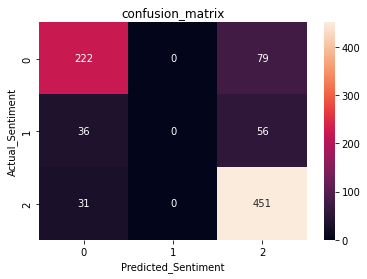

In [ ]:
trails(classifier_10)

## Data Balancing

In [ ]:
#review=review.iloc[0:500,:]
#review

In [ ]:
review=review.drop(columns=[ 'title','rating','rating_inference','sentiment','subjectivity'])
review
#,'sentiment','subjectivity'
# 'title','rating','rating_inference',

,body,rating_num
0,media could load smartwatch smartband offer le...,2
1,pathet qualiti product even worth rupe highli ...,0
2,get call notif smart watch,0
3,apart show accur time much healthi batteri loo...,0
4,product support one plu phone worthless produc...,0
...,...,...
4405,post day purchas watch automat switch useless,0
4406,sleep app sync accuratesometim touch screen ge...,1
4407,properli function worthi prize,0
4408,awesom cool love much receiv day place order w...,2


In [ ]:
import nlpaug.augmenter.word.context_word_embs as aug
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")
from tqdm.auto import tqdm
from sklearn.utils import shuffle

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

In [ ]:
def augmentMyData(xx, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    neu_xx = xx[xx['rating_num'] == 1].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(neu_xx), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(neu_xx['body'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'rating_num': 1,
        'body': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    xx = shuffle(xx.append(aug_df).reset_index(drop=True))
    return xx

In [ ]:
review['rating_num'].value_counts()

2    2384
0    1525
1     466
Name: rating_num, dtype: int64

In [ ]:
review_1 = augmentMyData(review, augmenter, samples=1918)

  0%|          | 0/1918 [00:00<?, ?it/s]

In [ ]:
review['rating_num'].value_counts()

2    2384
0    1525
1     466
Name: rating_num, dtype: int64

In [ ]:
review_1['rating_num'].value_counts()

1    2384
2    2384
0    1525
Name: rating_num, dtype: int64

In [ ]:
def augmentMyData(xx, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    neu_xx = xx[xx['rating_num'] == 1].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(neu_xx), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(neu_xx['body'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'rating_num': 0,
        'body': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    xx = shuffle(xx.append(aug_df).reset_index(drop=True))
    return xx

In [ ]:
review_2 = augmentMyData(review_1, augmenter, samples=859)

  0%|          | 0/859 [00:00<?, ?it/s]

In [ ]:
review['rating_num'].value_counts()

2    2384
0    1525
1     466
Name: rating_num, dtype: int64

In [ ]:
review_2['rating_num'].value_counts()

2    2384
0    2384
1    2384
Name: rating_num, dtype: int64

In [ ]:
review_2['body']

3464    second time order smartwatch us accuraci batte...
538                                              good one
3738                satisfi product qualiti well interfac
4410             touch screen outstand must go watch nice
6886    qualiti think that work be good for condit tha...
                              ...                        
200     pleas dont buy product upto qualiti perform sa...
4218    watch nice track data properlyy go fro look lo...
82      say cheap best cheap never gonna best like wat...
235     screen felt old guy must use kind smartphon pr...
6633    good price annual product average price requir...
Name: body, Length: 7152, dtype: object

In [ ]:
X=review_2['body']
y=review_2['rating_num']

In [ ]:
review_2['rating_num']


3464    2
538     2
3738    0
4410    2
6886    0
       ..
200     0
4218    2
82      2
235     1
6633    0
Name: rating_num, Length: 7152, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1)
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((6436,), (716,), (6436,), (716,))

In [ ]:
X_1=review_2['body']
y_1=review_2['rating_num']

In [ ]:
cv=CountVectorizer()

In [ ]:
X=review['body']

In [ ]:
y=review['rating_num']

In [ ]:
X_train, _, y_train, _ = train_test_split(X_1, y_1.values, test_size=0.1)
_, X_test, _, y_test = train_test_split(X,y.values, test_size=0.2)

## Applied models for balanced data

In [ ]:
classifier_11=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', GradientBoostingClassifier(loss='deviance',learning_rate=0.14)),])

In [ ]:
classifier_12=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', GradientBoostingClassifier(loss='deviance',learning_rate=0.14)),])

accuracy_score: 0.8228571428571428
confusion_matrix: 
 [[255  16  28]
 [ 22  51  23]
 [ 40  26 414]]
classification_report
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       299
           1       0.55      0.53      0.54        96
           2       0.89      0.86      0.88       480

    accuracy                           0.82       875
   macro avg       0.75      0.75      0.75       875
weighted avg       0.82      0.82      0.82       875


Precision Score
0.8234520054078412

Recall Score
0.8228571428571428


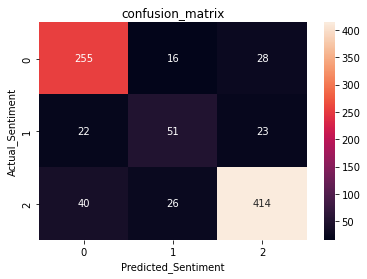

In [ ]:
trails(classifier_11)

accuracy_score: 0.8148571428571428
confusion_matrix: 
 [[230  11  58]
 [ 24  32  40]
 [ 18  11 451]]
classification_report
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       299
           1       0.59      0.33      0.43        96
           2       0.82      0.94      0.88       480

    accuracy                           0.81       875
   macro avg       0.75      0.68      0.70       875
weighted avg       0.80      0.81      0.80       875


Precision Score
0.8046133841514748

Recall Score
0.8148571428571428


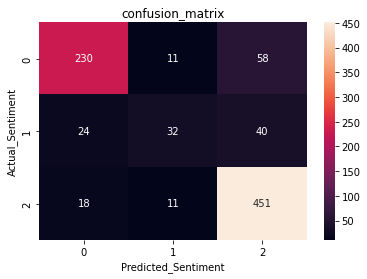

In [ ]:
trails(classifier_12)

In [ ]:
classifier_13=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', MultinomialNB(alpha=0.1)),])

In [ ]:
classifier_14=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', MultinomialNB(alpha=1.8)),])

accuracy_score: 0.8308571428571428
confusion_matrix: 
 [[244  22  33]
 [ 28  49  19]
 [ 30  16 434]]
classification_report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       299
           1       0.56      0.51      0.54        96
           2       0.89      0.90      0.90       480

    accuracy                           0.83       875
   macro avg       0.75      0.74      0.75       875
weighted avg       0.83      0.83      0.83       875


Precision Score
0.8277566854471781

Recall Score
0.8308571428571428


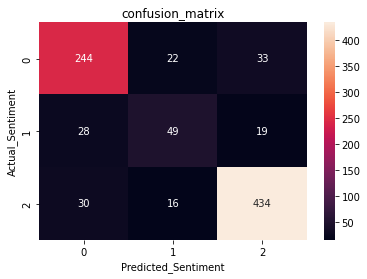

In [ ]:
trails(classifier_13)

accuracy_score: 0.7931428571428571
confusion_matrix: 
 [[233  24  42]
 [ 24  37  35]
 [ 32  24 424]]
classification_report
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       299
           1       0.44      0.39      0.41        96
           2       0.85      0.88      0.86       480

    accuracy                           0.79       875
   macro avg       0.70      0.68      0.69       875
weighted avg       0.79      0.79      0.79       875


Precision Score
0.7875177873615102

Recall Score
0.7931428571428571


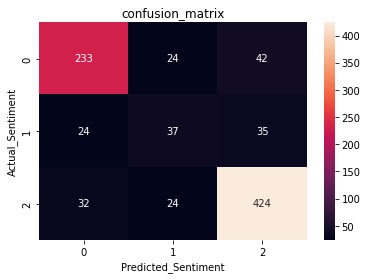

In [ ]:
trails(classifier_14)

In [ ]:
classifier_15=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', ComplementNB(alpha=2.4)),])

In [ ]:
classifier_16=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', ComplementNB(alpha=2)),])

accuracy_score: 0.8228571428571428
confusion_matrix: 
 [[244  14  41]
 [ 27  36  33]
 [ 33   7 440]]
classification_report
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       299
           1       0.63      0.38      0.47        96
           2       0.86      0.92      0.89       480

    accuracy                           0.82       875
   macro avg       0.76      0.70      0.72       875
weighted avg       0.81      0.82      0.81       875


Precision Score
0.8131581287849975

Recall Score
0.8228571428571428


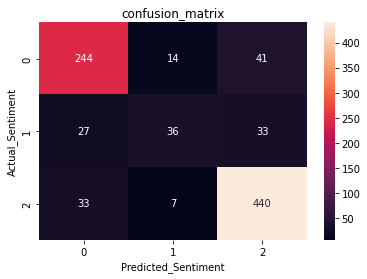

In [ ]:
trails(classifier_15)

accuracy_score: 0.8
confusion_matrix: 
 [[233  21  45]
 [ 28  33  35]
 [ 32  14 434]]
classification_report
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       299
           1       0.49      0.34      0.40        96
           2       0.84      0.90      0.87       480

    accuracy                           0.80       875
   macro avg       0.71      0.68      0.69       875
weighted avg       0.79      0.80      0.79       875


Precision Score
0.7881730230238999

Recall Score
0.8


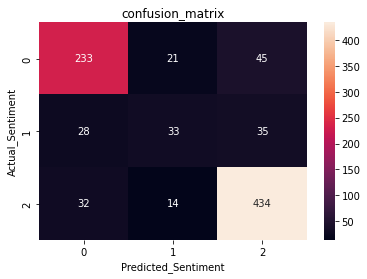

In [ ]:
trails(classifier_16)

In [ ]:
classifier_17=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', BernoulliNB(alpha=0.1)),])

In [ ]:
classifier_18=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', BernoulliNB(alpha=1.5)),])

accuracy_score: 0.7977142857142857
confusion_matrix: 
 [[209   3  87]
 [ 25  32  39]
 [ 19   4 457]]
classification_report
               precision    recall  f1-score   support

           0       0.83      0.70      0.76       299
           1       0.82      0.33      0.47        96
           2       0.78      0.95      0.86       480

    accuracy                           0.80       875
   macro avg       0.81      0.66      0.70       875
weighted avg       0.80      0.80      0.78       875


Precision Score
0.8023199442067367

Recall Score
0.7977142857142857


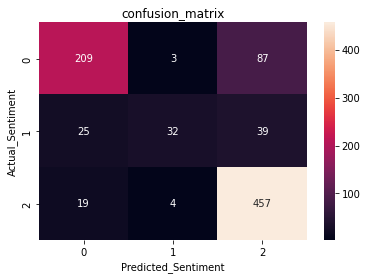

In [ ]:
trails(classifier_17)

accuracy_score: 0.7657142857142857
confusion_matrix: 
 [[192   3 104]
 [ 23  22  51]
 [ 20   4 456]]
classification_report
               precision    recall  f1-score   support

           0       0.82      0.64      0.72       299
           1       0.76      0.23      0.35        96
           2       0.75      0.95      0.84       480

    accuracy                           0.77       875
   macro avg       0.77      0.61      0.64       875
weighted avg       0.77      0.77      0.74       875


Precision Score
0.7718278329154338

Recall Score
0.7657142857142857


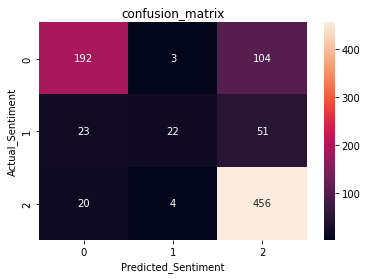

In [ ]:
trails(classifier_18)

In [ ]:
classifier_19=Pipeline([('vect', vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', SGDClassifier(alpha=0.001)),])

In [ ]:
classifier_20=Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', SGDClassifier(alpha=0.009)),])

accuracy_score: 0.8125714285714286
confusion_matrix: 
 [[233  20  46]
 [ 22  39  35]
 [ 26  15 439]]
classification_report
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       299
           1       0.53      0.41      0.46        96
           2       0.84      0.91      0.88       480

    accuracy                           0.81       875
   macro avg       0.73      0.70      0.71       875
weighted avg       0.80      0.81      0.81       875


Precision Score
0.8042864351191752

Recall Score
0.8125714285714286


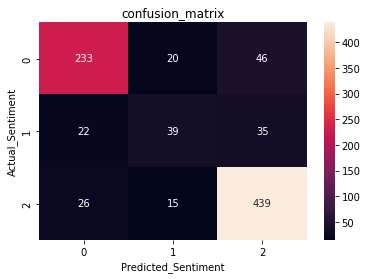

In [ ]:
trails(classifier_19)

accuracy_score: 0.8114285714285714
confusion_matrix: 
 [[223  18  58]
 [ 19  39  38]
 [ 20  12 448]]
classification_report
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       299
           1       0.57      0.41      0.47        96
           2       0.82      0.93      0.87       480

    accuracy                           0.81       875
   macro avg       0.75      0.70      0.71       875
weighted avg       0.80      0.81      0.80       875


Precision Score
0.804625546999417

Recall Score
0.8114285714285714


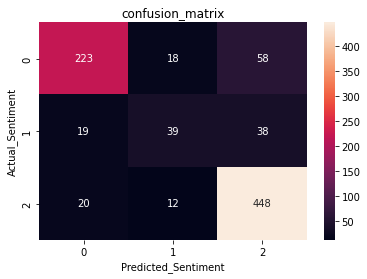

In [ ]:
trails(classifier_20)

## Model Deployment

In [ ]:
cv=CountVectorizer()

In [ ]:
import pickle

pickle.dump(cv,open('transfomers.pkl','wb'))

In [ ]:
ti=TfidfVectorizer()

In [ ]:
import pickle

pickle.dump(ti,open('transfomers_tf-idf.pkl','wb'))

In [ ]:
X_1=review_2['body']
y_1=review_2['rating_num']

In [ ]:
X=review['body']

In [ ]:
y=review['rating_num']

In [ ]:
X_1=cv.fit_transform(X_1)

In [ ]:
X=cv.fit_transform(X)

In [ ]:
X_train, _, y_train, _ = train_test_split(X_1, y_1.values, test_size=0.1)
_, X_test, _, y_test = train_test_split(X,y.values, test_size=0.5)

In [ ]:
import pickle

In [ ]:
clf=MultinomialNB(alpha=1.8)

clf.fit(X_train,y_train)

pickle.dump(clf,open('nlp_model.pkl','wb'))